In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# nasa tmp
# https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
# https://www.macrotrends.net/countries/WLD/world/population
# https://www.macrotrends.net/countries/WLD/world/gdp-gross-domestic-product


import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/temp/graph.csv', sep=',')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/temp/pop.csv', sep=',')

In [40]:
print(df1.head(10))
print(df1.tail())

   Land           #NAME?  ure Index (C)
0  ----  ---------------  -------------
1   NaN              NaN            NaN
2  Year     No_Smoothing      Lowess(5)
3  ----  ---------------      ---------
4  1880            -0.16          -0.08
5  1881            -0.08          -0.12
6  1882             -0.1          -0.16
7  1883            -0.16           -0.2
8  1884            -0.28          -0.23
9  1885            -0.33          -0.26
     Land #NAME? ure Index (C)
140  2016   1.01          0.87
141  2017   0.92          0.91
142  2018   0.85          0.95
143  2019   0.98          0.98
144  2020   1.02          1.01


In [41]:
df1_new = df1.iloc[4:,:2]
print(df1_new.head())
print(df1_new.tail())

   Land #NAME?
4  1880  -0.16
5  1881  -0.08
6  1882   -0.1
7  1883  -0.16
8  1884  -0.28
     Land #NAME?
140  2016   1.01
141  2017   0.92
142  2018   0.85
143  2019   0.98
144  2020   1.02


In [42]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 4 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Land    141 non-null    object
 1   #NAME?  141 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [43]:
df1_new.columns = ['year', 'tmp']


In [44]:
df1_new.year= df1_new.year.astype(int)
df1_new.tmp= df1_new.tmp.astype(float)
df1_new = df1_new.set_index('year')
df1_new

,tmp
year,
1880,-0.16
1881,-0.08
1882,-0.10
1883,-0.16
1884,-0.28
...,...
2016,1.01
2017,0.92
2018,0.85


In [45]:
df1_new.describe()

,tmp
count,141.000000
mean,0.049291
std,0.358341
min,-0.480000
25%,-0.200000
50%,-0.070000
75%,0.230000
max,1.020000


In [49]:
print(df2.head(10))
print(df2.tail())
df2_new = df2.iloc[:,:2]
print(df2_new.head())
print(df2_new.tail())
df2_new.info()
df2_new.columns = ['year', 'pop']
df2_new.info()

df2_new['pop'] = df2_new['pop'].str.replace(',', '')
df2_new['pop'] = df2_new['pop'].astype(float)
print(df2_new.head())
print(df2_new.tail())

df2_new_2 = df2_new.set_index('year')
print(df2_new_2.head())

   Year     Population Growth Rate
0  2022  7,953,952,567       1.00%
1  2021  7,874,965,825       1.03%
2  2020  7,794,798,739       1.05%
3  2019  7,713,468,100       1.08%
4  2018  7,631,091,040       1.10%
5  2017  7,547,858,925       1.12%
6  2016  7,464,022,049       1.14%
7  2015  7,379,797,139       1.16%
8  2014  7,295,290,765       1.17%
9  2013  7,210,581,976       1.19%
    Year     Population Growth Rate
68  1954  2,724,846,741       1.76%
69  1953  2,677,608,960       1.78%
70  1952  2,630,861,562       1.81%
71  1951  2,584,034,261       1.88%
72  1950  2,536,431,149       0.00%
   Year     Population
0  2022  7,953,952,567
1  2021  7,874,965,825
2  2020  7,794,798,739
3  2019  7,713,468,100
4  2018  7,631,091,040
    Year     Population
68  1954  2,724,846,741
69  1953  2,677,608,960
70  1952  2,630,861,562
71  1951  2,584,034,261
72  1950  2,536,431,149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column    

In [51]:
Xy = pd.concat([df1_new, df2_new_2], axis = 1) # 가로로 합치기
print(Xy.head())
print(Xy.tail())

       tmp  pop
year           
1880 -0.16  NaN
1881 -0.08  NaN
1882 -0.10  NaN
1883 -0.16  NaN
1884 -0.28  NaN
       tmp           pop
year                    
2018  0.85  7.631091e+09
2019  0.98  7.713468e+09
2020  1.02  7.794799e+09
2021   NaN  7.874966e+09
2022   NaN  7.953953e+09


In [59]:
Xy_new = Xy.dropna(axis=0)
print(Xy_new.head())
print(Xy_new.tail())

       tmp           pop
year                    
1950 -0.17  2.536431e+09
1951 -0.07  2.584034e+09
1952  0.01  2.630862e+09
1953  0.08  2.677609e+09
1954 -0.13  2.724847e+09
       tmp           pop
year                    
2016  1.01  7.464022e+09
2017  0.92  7.547859e+09
2018  0.85  7.631091e+09
2019  0.98  7.713468e+09
2020  1.02  7.794799e+09


In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

y = Xy_new.tmp
X = Xy_new.iloc[:,1:]
scaler = StandardScaler() # z-score
X_scaled = scaler.fit_transform(X)
print(y)
print(X_scaled)

year
1950   -0.17
1951   -0.07
1952    0.01
1953    0.08
1954   -0.13
        ... 
2016    1.01
2017    0.92
2018    0.85
2019    0.98
2020    1.02
Name: tmp, Length: 71, dtype: float64
[[-1.52035349]
 [-1.49058057]
 [-1.46129288]
 [-1.43205516]
 [-1.40251074]
 [-1.37238127]
 [-1.34146991]
 [-1.30965825]
 [-1.27689729]
 [-1.24319262]
 [-1.20855975]
 [-1.17297609]
 [-1.13633948]
 [-1.09845016]
 [-1.05906158]
 [-1.0180294 ]
 [-0.9752874 ]
 [-0.9309766 ]
 [-0.88542629]
 [-0.83909272]
 [-0.79233702]
 [-0.74522724]
 [-0.69776216]
 [-0.65014738]
 [-0.60260518]
 [-0.55526782]
 [-0.50824329]
 [-0.46143582]
 [-0.41451062]
 [-0.36699427]
 [-0.31852425]
 [-0.26911867]
 [-0.21883965]
 [-0.16743921]
 [-0.11462557]
 [-0.06026846]
 [-0.00420011]
 [ 0.0533118 ]
 [ 0.11141764]
 [ 0.16896789]
 [ 0.22512589]
 [ 0.27957573]
 [ 0.33250699]
 [ 0.384217  ]
 [ 0.43522347]
 [ 0.48592328]
 [ 0.53638318]
 [ 0.58651464]
 [ 0.63639236]
 [ 0.68608056]
 [ 0.7356497 ]
 [ 0.78514255]
 [ 0.83464403]
 [ 0.88431147]
 [ 0

In [61]:
model = LinearRegression()
model_train = model.fit(X_scaled,y)
y_pred = model_train.predict(X_scaled)

print(zip(y,y_pred))
print(r2_score(y,y_pred))

0.8950370360640056


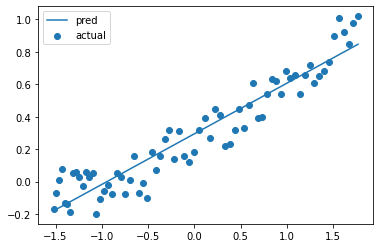

In [69]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:,0],y, label = 'actual')
plt.plot(X_scaled[:,0],y_pred, label = 'pred')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


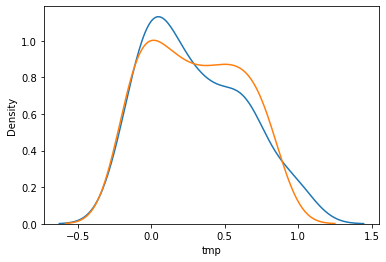

In [70]:
import seaborn as sns

plt.figure()
ax1 = sns.distplot(y, hist=False, label = 'actual')
ax2 = sns.distplot(y_pred, hist=False, label = 'pred', ax = ax1)
plt.show()

In [78]:
a = model.coef_
b = model.intercept_
print(a)
print(b)
print('y = {}x + {}'.format(a,b))

[0.31244445]
0.29450704225352126
y = [0.31244445]x + 0.29450704225352126


In [79]:
#인구수가 10억, 20억일때 지구 온도는?
x1 = 10e+09
x2 = 20e+09
y1 = a * x1 + b
y2 = a * x2 + b
print(y1, y2)

[3.12444451e+09] [6.24888902e+09]
